In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import random
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import os.path
from tqdm import tqdm
import math
import cv2

In [2]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

# List of image filenames
image_filenames = ["grey_1.png", "grey_2.png", "grey_3.png", "grey_4.png"]


def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))

    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]

    return eq_histo, en_img






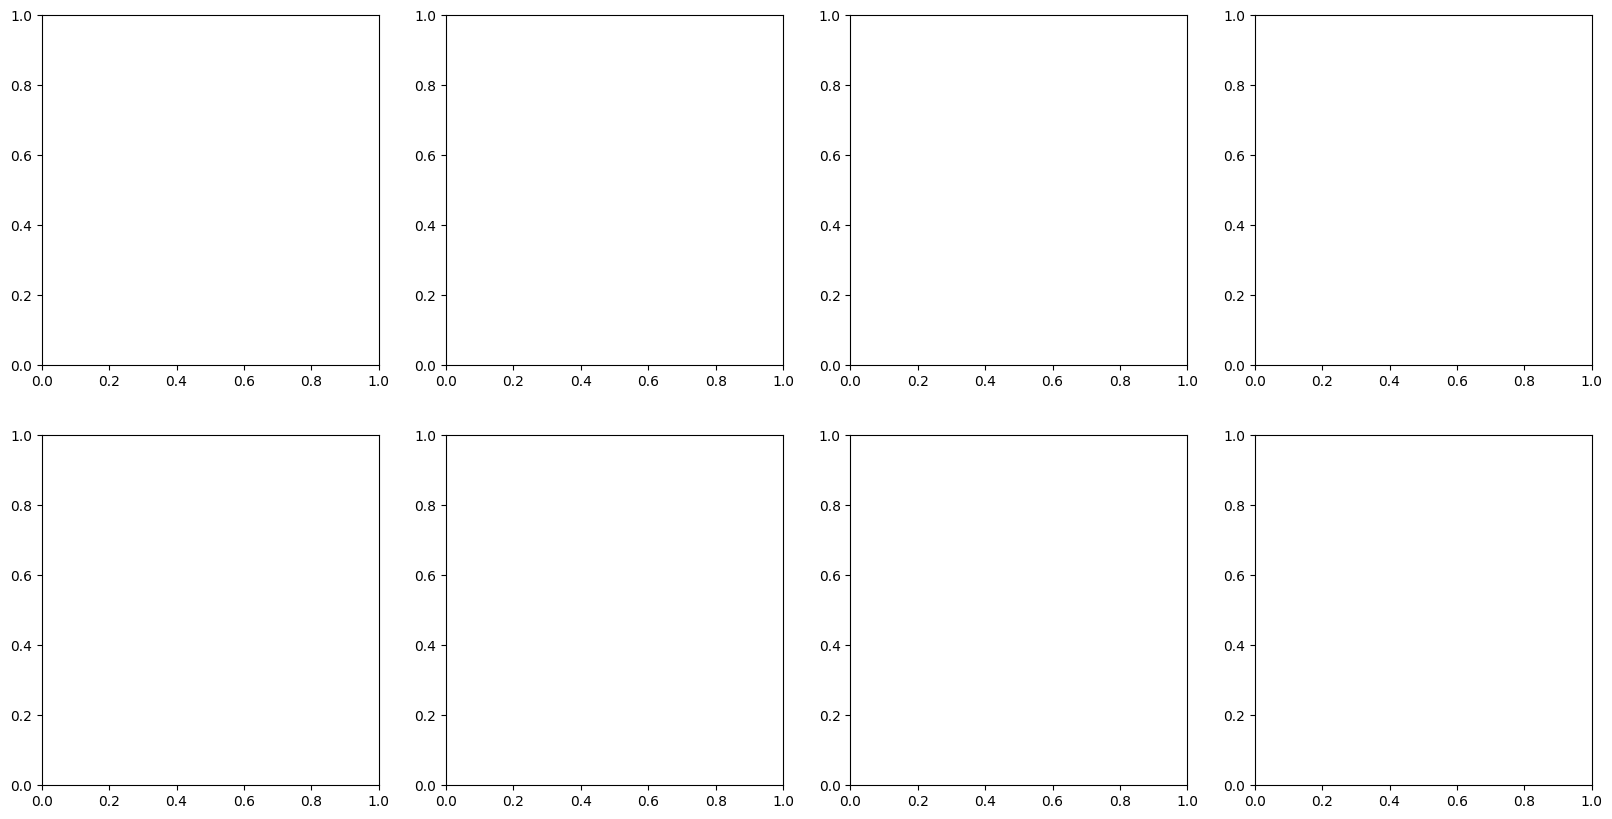

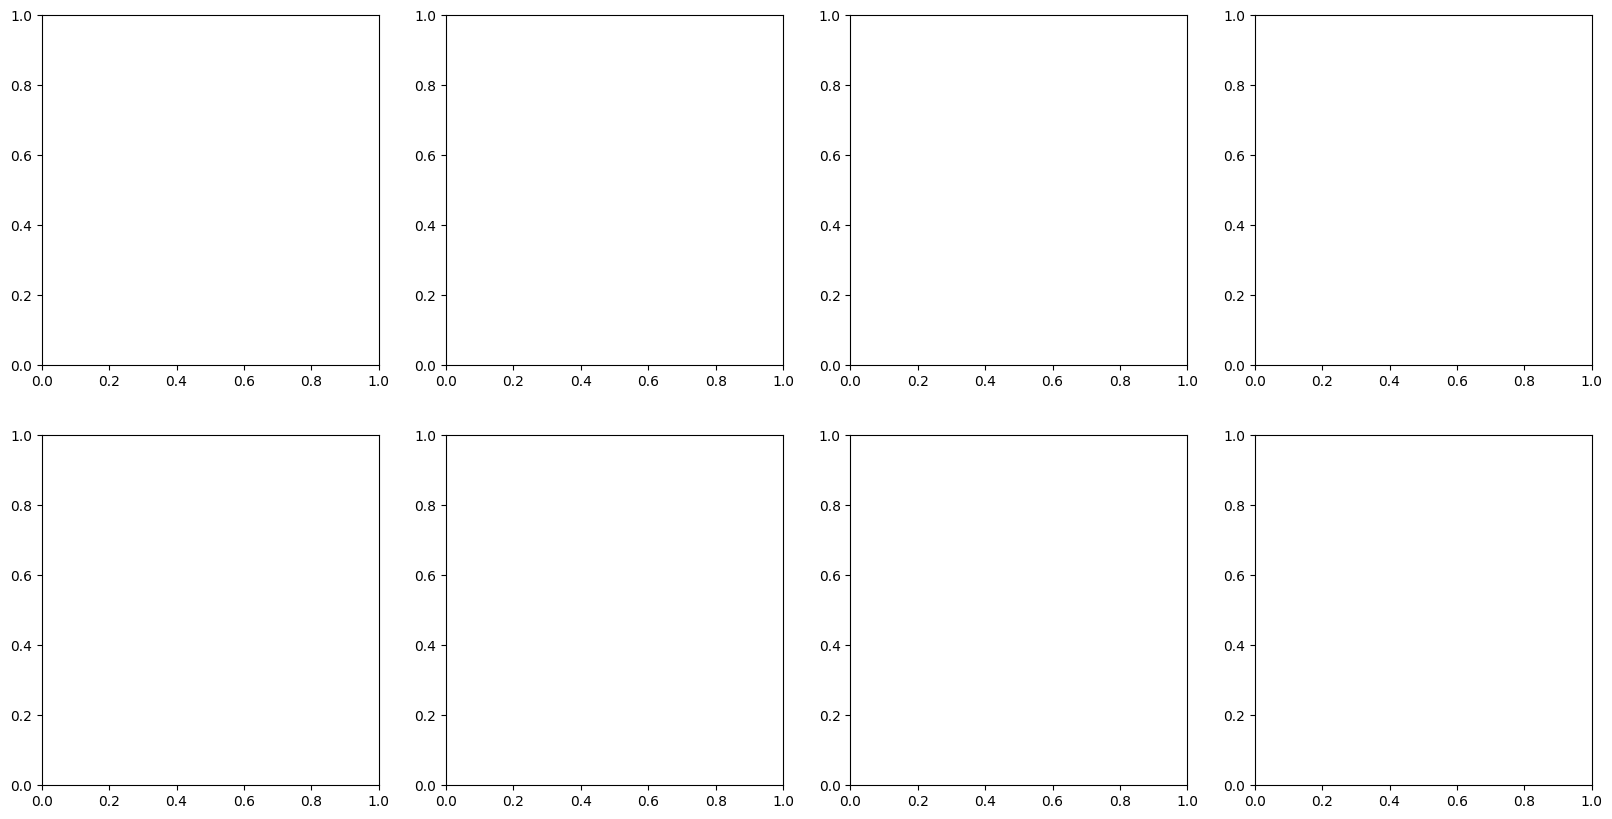

In [3]:
# Create subplots for original images and histograms
fig_original, axs_original = plt.subplots(2, len(image_filenames), figsize=(20, 10))

# Create subplots for equalized histograms and enhanced images
fig_equalized, axs_equalized = plt.subplots(2, len(image_filenames), figsize=(20, 10))


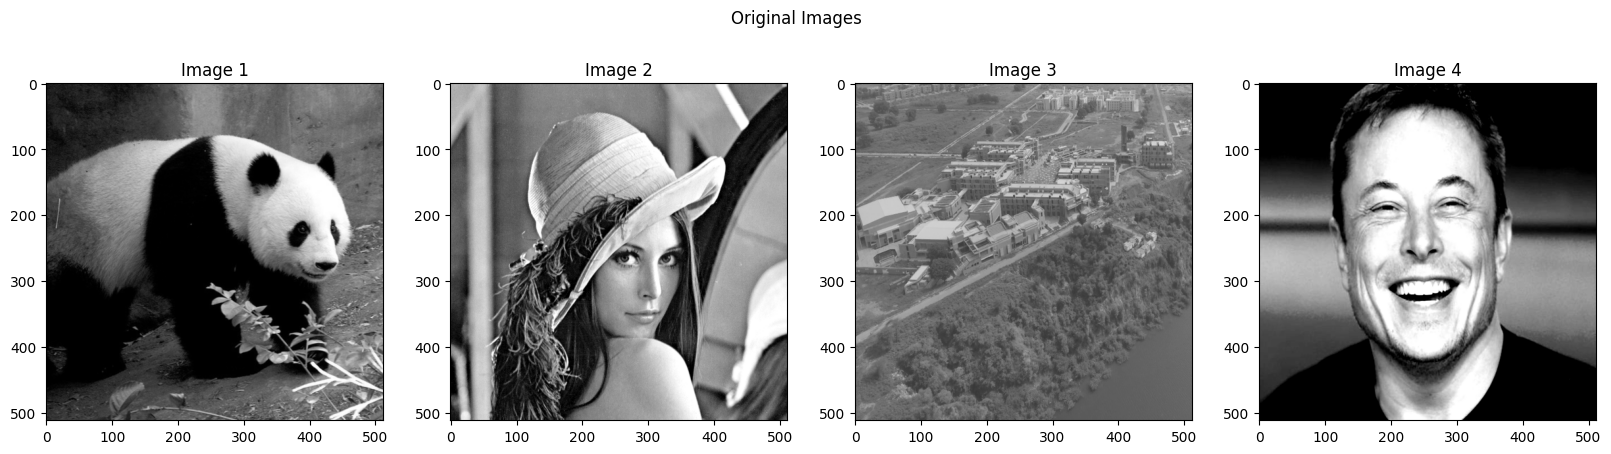

In [4]:
fig_original, axs_original = plt.subplots(1, len(image_filenames), figsize=(20, 5))

for i, filename in enumerate(image_filenames):
    image = cv2.imread(filename)

    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axs_original[i].imshow(image_rgb)
        axs_original[i].set_title(f"Image {i+1}")

# Set a title for the original figure
fig_original.suptitle("Original Images");



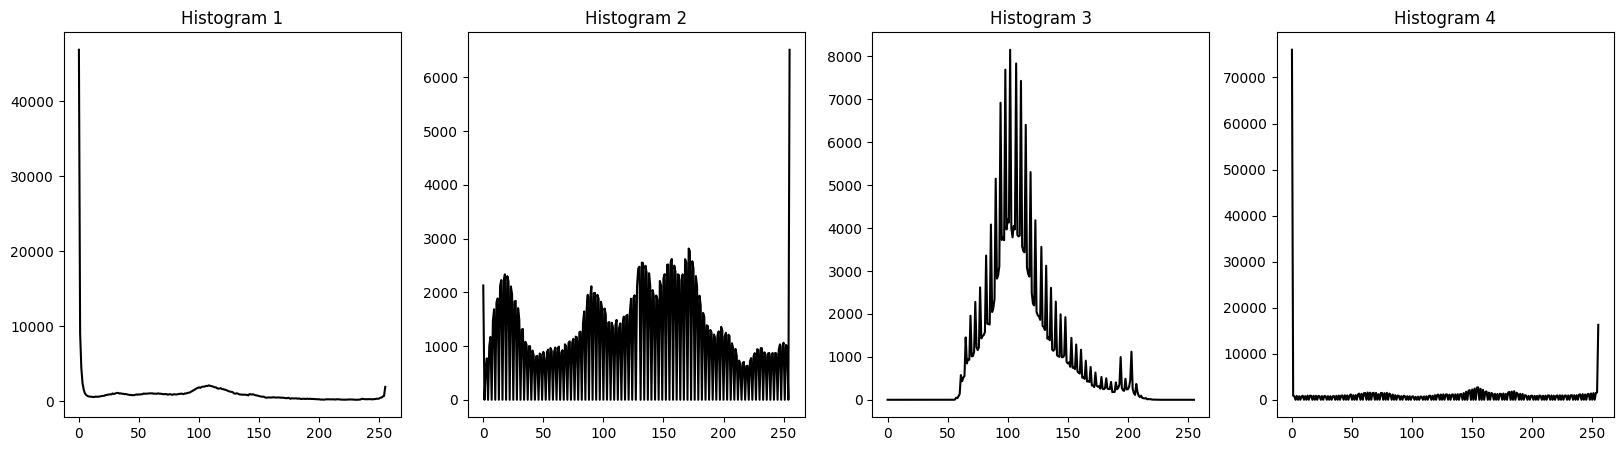

In [5]:
fig_original, axs_original = plt.subplots(1, len(image_filenames), figsize=(20, 5))
for i, filename in enumerate(image_filenames):
    image = cv2.imread(filename)

    if image is not None:
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        axs_original[i].plot(histogram, color='black')
        axs_original[i].set_title(f"Histogram {i+1}")

In [6]:

def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))

    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]

    return eq_histo, en_img

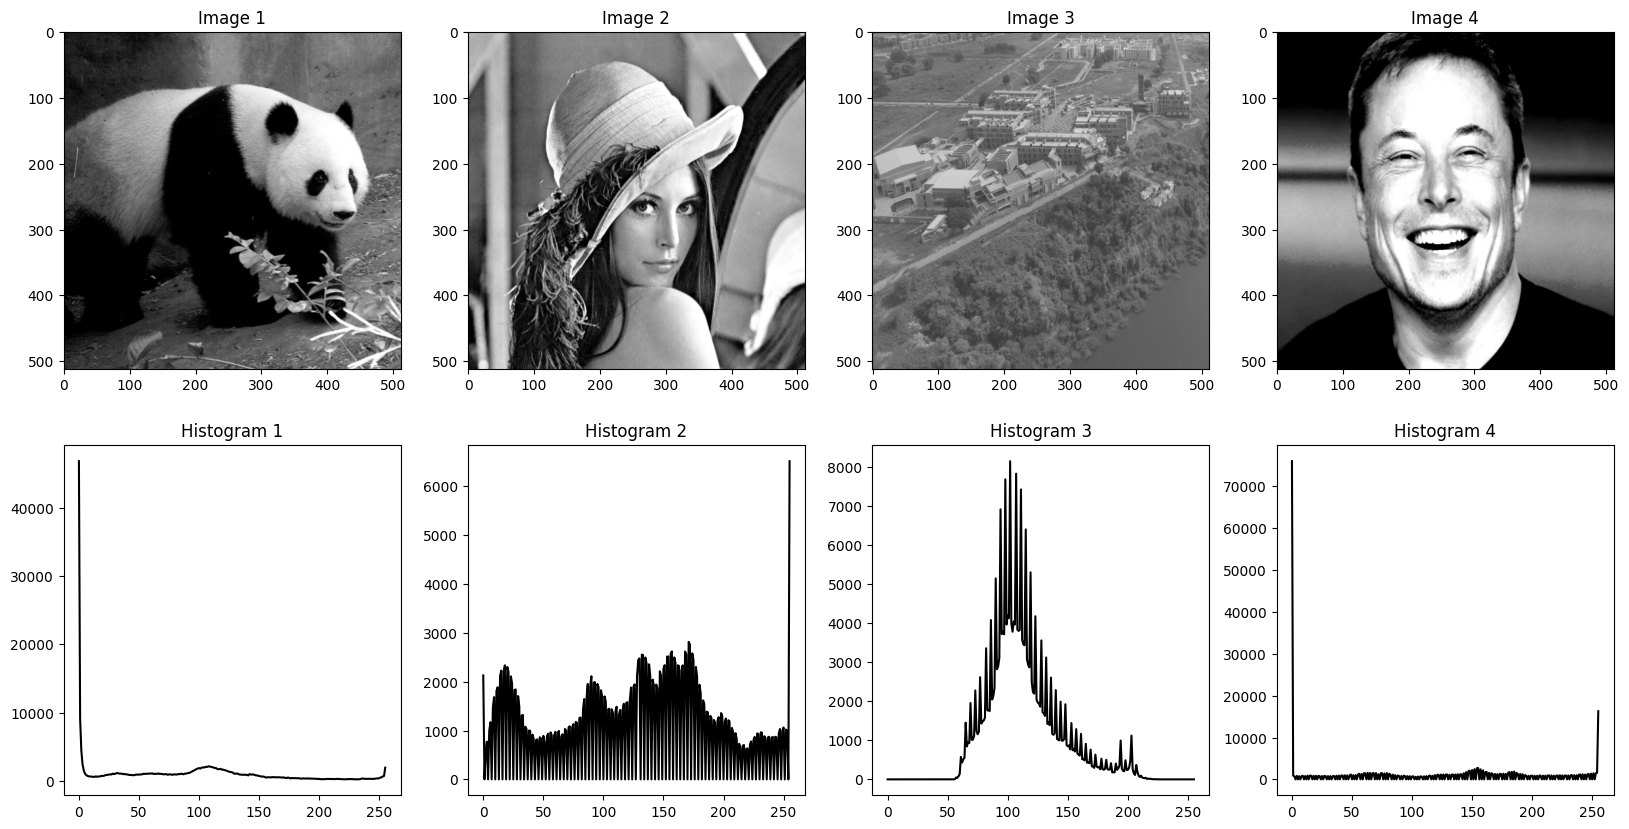

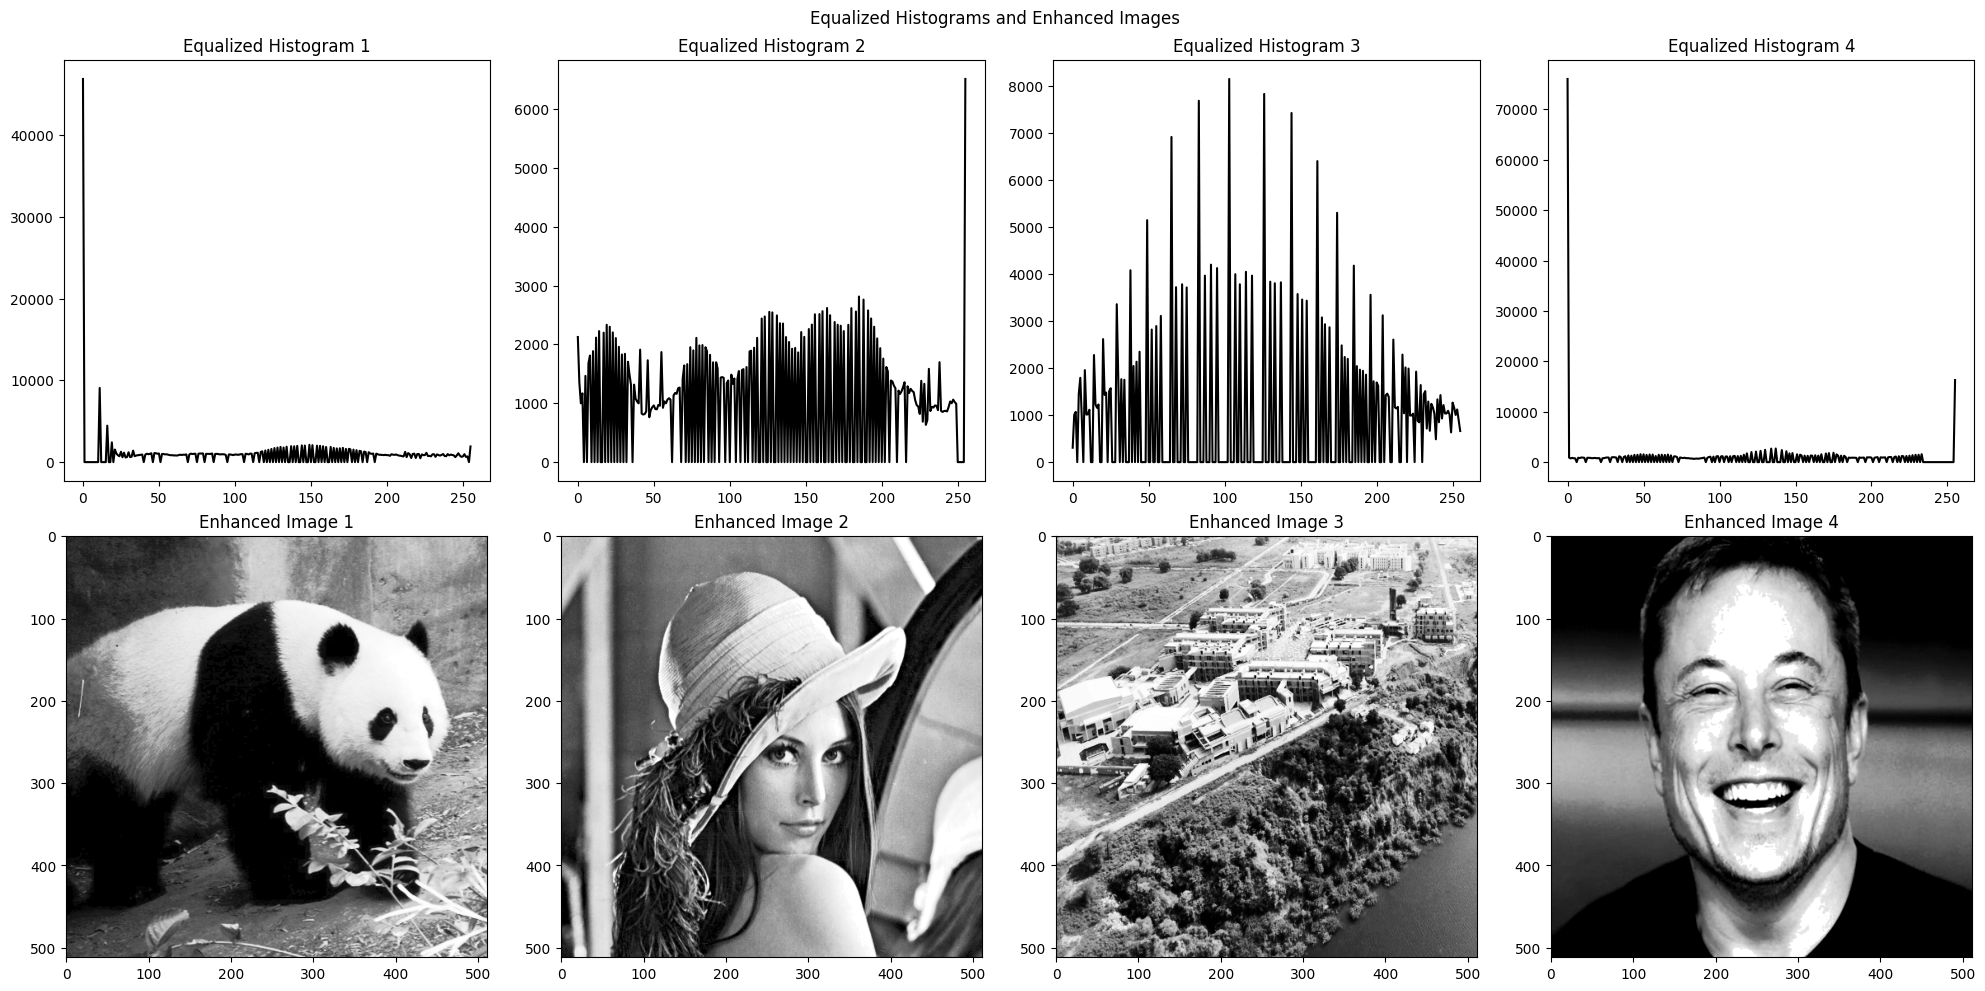

In [17]:
fig_original, axs_original = plt.subplots(2, len(image_filenames), figsize=(20, 10))
fig_equalized, axs_equalized = plt.subplots(2, len(image_filenames), figsize=(20, 10))

def equalize_histogram(image):
    # Equalize the histogram
    enhanced_image = cv2.equalizeHist(image)

    # Calculate and return the equalized histogram
    eq_histogram = cv2.calcHist([enhanced_image], [0], None, [256], [0, 256])

    return eq_histogram, enhanced_image

for i, filename in enumerate(image_filenames):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs_original[0, i].imshow(image_rgb)
        axs_original[0, i].set_title(f"Image {i+1}")
        # Equalize the histogram and get the results
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

        # Plot original histograms in the first figure
        axs_original[1, i].plot(histogram, color='black')
        axs_original[1, i].set_title(f"Histogram {i+1}")
        eq_histogram, enhanced_image = equalize_histogram(image)

        # Plot equalized histograms in the second figure
        axs_equalized[0, i].plot(eq_histogram, color='black')
        axs_equalized[0, i].set_title(f"Equalized Histogram {i+1}")

        # Display enhanced images in the second figure
        axs_equalized[1, i].imshow(enhanced_image, cmap='gray')
        axs_equalized[1, i].set_title(f"Enhanced Image {i+1}")

# Set title for the figure
fig_equalized.suptitle("Equalized Histograms and Enhanced Images")

# Display the figure
plt.tight_layout()
plt.show()